<a href="https://colab.research.google.com/github/Xantanio/myProjects/blob/main/AlgoritmosGen%C3%A9ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Avaliação de sensibilidade do Algoritmo Genético:**
Se o tamanho da população for muito grande o Algoritmo perde bastante eficiência, tornando os cálculos desnecessariamente complexos.
Enquanto que a taxa de mutação, se muito baixa, desfavorece a geração de novas soluções e gera a perca de flexibilidade para fugir de mínimos/máximos locais. Já, se muito alta, gera filhos que podem ser aleatórios demais, perdendo as qualidades do fitness que foram selecionadas durante a seleção e o cruzamento, podendo gerar até mesmo uma busca de caráter aleatório.
Quando usamos valores altos para a seleção do torneio, perdemos em qualidade, o que permite a seleção de indivíduos menos hábeis. Enquanto que, se usamos valores muito pequenos, perdemos indivíduos que poderiam nos levar a soluções ótimas ou próximas do ótimo.

Executando Algoritmo Genético...

Geração 1: Melhor Custo = 335
Geração 2: Melhor Custo = 335
Geração 3: Melhor Custo = 333
Geração 4: Melhor Custo = 290
Geração 5: Melhor Custo = 290
Geração 6: Melhor Custo = 277
Geração 7: Melhor Custo = 275
Geração 8: Melhor Custo = 275
Geração 9: Melhor Custo = 275
Geração 10: Melhor Custo = 275
Geração 11: Melhor Custo = 275
Geração 12: Melhor Custo = 275
Geração 13: Melhor Custo = 275
Geração 14: Melhor Custo = 275
Geração 15: Melhor Custo = 260
Geração 16: Melhor Custo = 260
Geração 17: Melhor Custo = 237
Geração 18: Melhor Custo = 237
Geração 19: Melhor Custo = 237
Geração 20: Melhor Custo = 237
Geração 21: Melhor Custo = 237
Geração 22: Melhor Custo = 237
Geração 23: Melhor Custo = 237
Geração 24: Melhor Custo = 221
Geração 25: Melhor Custo = 221
Geração 26: Melhor Custo = 217
Geração 27: Melhor Custo = 217
Geração 28: Melhor Custo = 217
Geração 29: Melhor Custo = 217
Geração 30: Melhor Custo = 217
Geração 31: Melhor Custo = 217
Geração 32: Me

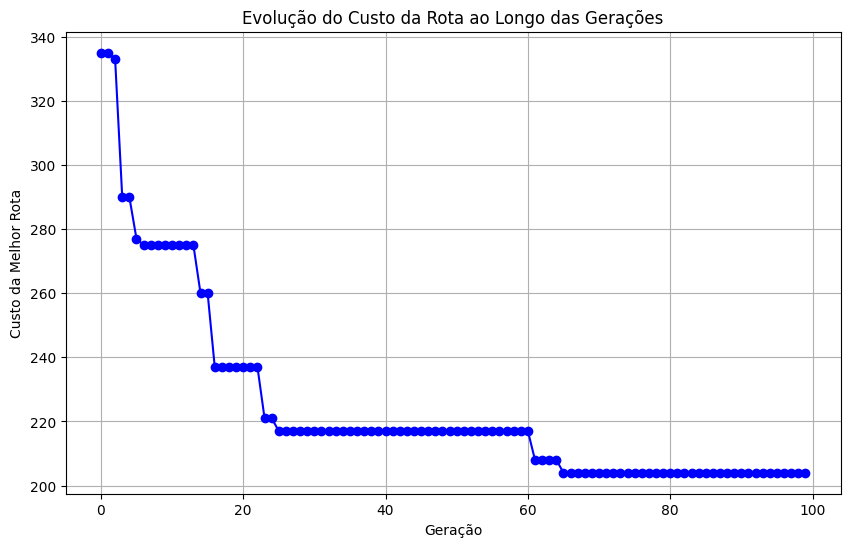

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Função de cálculo da distância total da rota
def calcular_custo_rota(dist_matrix, rota):
    custo = 0
    for i in range(len(rota) - 1):
        custo += dist_matrix[rota[i]][rota[i + 1]]
    custo += dist_matrix[rota[-1]][rota[0]]  # Retorno à cidade inicial
    return custo

# Função principal do Algoritmo Genético
def algoritmo_genetico(dist_matrix, num_geracoes, tam_populacao, taxa_mutacao, elitismo=True):
    num_cidades = len(dist_matrix)

    # Geração inicial da população: Rotas aleatórias
    populacao = [random.sample(range(num_cidades), num_cidades) for _ in range(tam_populacao)]

    # Avalia o custo das rotas
    def avaliar_populacao(populacao):
        return [calcular_custo_rota(dist_matrix, individuo) for individuo in populacao]

    # Seleção: Torneio
    def selecao_torneio(populacao, aptidoes, tamanho_torneio=3):
        selecionados = []
        for _ in range(tam_populacao):
            torneio = random.sample(list(zip(populacao, aptidoes)), tamanho_torneio)
            vencedor = min(torneio, key=lambda x: x[1])
            selecionados.append(vencedor[0])
        return selecionados

    # Crossover (Ordenado)
    def crossover(pai1, pai2):
        start, end = sorted(random.sample(range(num_cidades), 2))
        filho = [-1] * num_cidades
        filho[start:end + 1] = pai1[start:end + 1]
        ptr = 0
        for cidade in pai2:
            if cidade not in filho:
                while filho[ptr] != -1:
                    ptr += 1
                filho[ptr] = cidade
        return filho

    # Mutação (Troca de duas cidades)
    def mutacao(individuo):
        if random.random() < taxa_mutacao:
            i, j = random.sample(range(num_cidades), 2)
            individuo[i], individuo[j] = individuo[j], individuo[i]
        return individuo

    # Algoritmo Genético
    melhor_custo = float("inf")
    melhor_rota = None
    historico_custos = []  # Lista para armazenar os melhores custos por geração

    for geracao in range(num_geracoes):
        aptidoes = avaliar_populacao(populacao)
        nova_populacao = []

        # Elitismo: Mantém o melhor indivíduo
        if elitismo:
            elite_idx = np.argmin(aptidoes)
            nova_populacao.append(populacao[elite_idx])

        # Seleção e Reprodução
        selecionados = selecao_torneio(populacao, aptidoes)
        for i in range(0, tam_populacao - len(nova_populacao), 2):
            pai1, pai2 = selecionados[i], selecionados[i + 1]
            filho1 = crossover(pai1, pai2)
            filho2 = crossover(pai2, pai1)
            nova_populacao.append(mutacao(filho1))
            nova_populacao.append(mutacao(filho2))

        populacao = nova_populacao

        # Atualiza o melhor resultado
        aptidoes = avaliar_populacao(populacao)
        menor_custo_idx = np.argmin(aptidoes)
        if aptidoes[menor_custo_idx] < melhor_custo:
            melhor_custo = aptidoes[menor_custo_idx]
            melhor_rota = populacao[menor_custo_idx]

        # Armazena o melhor custo desta geração
        historico_custos.append(melhor_custo)

        print(f"Geração {geracao + 1}: Melhor Custo = {melhor_custo}")

    return melhor_rota, melhor_custo, historico_custos

# Função para plotar o gráfico de evolução dos custos
def plotar_evolucao(historico_custos):
    plt.figure(figsize=(10, 6))
    plt.plot(historico_custos, marker='o', linestyle='-', color='b')
    plt.title("Evolução do Custo da Rota ao Longo das Gerações")
    plt.xlabel("Geração")
    plt.ylabel("Custo da Melhor Rota")
    plt.grid()
    plt.show()

# Código para executar o Algoritmo Genético
def executar_algoritmo_genetico():
    # Exemplo de matriz de distâncias
    dist_matrix = np.array([
        [0, 10, 15, 45, 5, 45, 50, 44, 30, 100, 67, 33, 90, 12, 50],
        [15, 0, 100, 30, 20, 25, 80, 45, 41, 5, 45, 10, 90, 10, 35],
        [40, 80, 0, 90, 70, 33, 100, 70, 30, 23, 80, 60, 47, 33, 25],
        [100, 8, 5, 0, 5, 40, 21, 20, 35, 14, 55, 35, 21, 5, 40],
        [17, 10, 33, 45, 0, 14, 50, 27, 33, 60, 17, 10, 20, 13, 71],
        [15, 70, 90, 20, 11, 0, 15, 35, 30, 15, 18, 35, 15, 90, 23],
        [25, 19, 18, 30, 100, 55, 0, 70, 55, 41, 55, 100, 18, 14, 18],
        [40, 15, 60, 45, 70, 33, 25, 0, 27, 60, 80, 35, 30, 41, 35],
        [21, 34, 17, 10, 11, 40, 8, 32, 0, 47, 76, 40, 21, 90, 21],
        [35, 100, 5, 18, 43, 25, 14, 30, 39, 0, 17, 35, 15, 13, 40],
        [38, 20, 23, 30, 5, 55, 50, 33, 70, 14, 0, 60, 30, 35, 21],
        [15, 14, 45, 21, 100, 10, 8, 20, 35, 43, 8, 0, 15, 100, 23],
        [80, 10, 5, 20, 35, 8, 90, 5, 44, 10, 80, 14, 0, 25, 80],
        [33, 90, 40, 18, 70, 45, 25, 23, 90, 44, 43, 70, 5, 0, 25],
        [25, 70, 45, 50, 5, 45, 20, 100, 25, 50, 35, 10, 90, 5, 0],
    ])

    # Configuração dos parâmetros
    num_geracoes = 100
    tam_populacao = 100
    taxa_mutacao = 0.5

    print("Executando Algoritmo Genético...\n")
    melhor_rota, melhor_custo, historico_custos = algoritmo_genetico(dist_matrix, num_geracoes, tam_populacao, taxa_mutacao)

    # Resultados
    print("\nMelhor Rota Encontrada:", melhor_rota)
    print("Custo da Melhor Rota:", melhor_custo)

    # Visualização da evolução do custo
    plotar_evolucao(historico_custos)

# Chama a execução do Algoritmo Genético
executar_algoritmo_genetico()


**Análise de sensibilidade do Algoritmo da Colônia de Formigas:** quanto maior o número de formigas, menor a variação do algoritmos. E, quanto menor, mais o algoritmo varia na solução. Isso acontece pois as rotas são pouco trilhadas, desfortalecendo soluções ótimas ou subótimas.
A variação em relação a alfa (importância dos feromônios) e beta (importância da heurística) é a seguinte:
Aumentando a importância da heurística, perdemos a variação que ocorreria devido aos feromônios. O inverso vale para alfa, que, se supervalorizado, tira a flexibilidade dos caminhos percorridos pelas formigas. A taxa de evaporação e Q influenciam na atualização do valor de feromônios a cada iteração.

Iteração 1: Melhor Custo = 217
Iteração 2: Melhor Custo = 205
Iteração 3: Melhor Custo = 195
Iteração 4: Melhor Custo = 191
Iteração 5: Melhor Custo = 191
Iteração 6: Melhor Custo = 191
Iteração 7: Melhor Custo = 191
Iteração 8: Melhor Custo = 191
Iteração 9: Melhor Custo = 191
Iteração 10: Melhor Custo = 191
Iteração 11: Melhor Custo = 191
Iteração 12: Melhor Custo = 191
Iteração 13: Melhor Custo = 191
Iteração 14: Melhor Custo = 191
Iteração 15: Melhor Custo = 191
Iteração 16: Melhor Custo = 191
Iteração 17: Melhor Custo = 191
Iteração 18: Melhor Custo = 191
Iteração 19: Melhor Custo = 191
Iteração 20: Melhor Custo = 191
Iteração 21: Melhor Custo = 191
Iteração 22: Melhor Custo = 191
Iteração 23: Melhor Custo = 191
Iteração 24: Melhor Custo = 191
Iteração 25: Melhor Custo = 191
Iteração 26: Melhor Custo = 191
Iteração 27: Melhor Custo = 191
Iteração 28: Melhor Custo = 191
Iteração 29: Melhor Custo = 191
Iteração 30: Melhor Custo = 191
Iteração 31: Melhor Custo = 191
Iteração 32: Melh

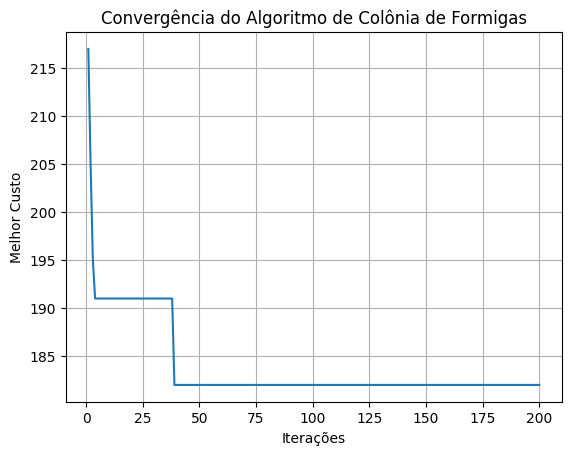

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Função para calcular o custo total de uma rota
def calcular_custo(rota, matriz_custos):
    custo_total = 0
    for i in range(len(rota) - 1):
        custo_total += matriz_custos[rota[i]][rota[i+1]]
    custo_total += matriz_custos[rota[-1]][rota[0]]  # Retorno à cidade inicial
    return custo_total

# Função para escolher a próxima cidade com base na probabilidade
def escolher_proxima_cidade(cidade_atual, cidades_restantes, feromonio, heuristica, alpha, beta):
    probabilidades = []
    for cidade in cidades_restantes:
        fer = feromonio[cidade_atual][cidade] ** alpha
        heu = heuristica[cidade_atual][cidade] ** beta
        probabilidades.append(fer * heu)

    # Normalizar as probabilidades
    soma = sum(probabilidades)
    probabilidades = [p / soma for p in probabilidades]

    # Escolher próxima cidade com base nas probabilidades
    return random.choices(cidades_restantes, weights=probabilidades, k=1)[0]

# Função principal
def colonia_de_formigas(matriz_custos, num_formigas, num_iteracoes, alpha=1.0, beta=5.0, evaporacao=0.5, Q=100):
    num_cidades = len(matriz_custos)

    # Inicializar trilha de feromônio
    feromonio = np.ones((num_cidades, num_cidades)) # Array de 1's
    heuristica = 1 / (matriz_custos + 1e-10)  # Heurística baseada no inverso do custo

    melhor_rota = None
    melhor_custo = float('inf')
    custos_por_iteracao = []  # Para armazenar o custo de cada iteração

    for iteracao in range(num_iteracoes):
        rotas = []
        custos = []

        # Cada formiga constrói uma rota
        for formiga in range(num_formigas):
            rota = []
            cidades_restantes = list(range(num_cidades))
            cidade_atual = random.choice(cidades_restantes)
            rota.append(cidade_atual)
            cidades_restantes.remove(cidade_atual)

            while cidades_restantes:
                proxima_cidade = escolher_proxima_cidade(cidade_atual, cidades_restantes, feromonio, heuristica, alpha, beta)
                rota.append(proxima_cidade)
                cidades_restantes.remove(proxima_cidade)
                cidade_atual = proxima_cidade

            rotas.append(rota)
            custo = calcular_custo(rota, matriz_custos)
            custos.append(custo)

            # Atualizar melhor solução
            if custo < melhor_custo:
                melhor_custo = custo
                melhor_rota = rota

        # Atualização do feromônio
        feromonio *= (1 - evaporacao)  # Evaporação
        for i, rota in enumerate(rotas):
            custo = custos[i]
            for j in range(len(rota) - 1):
                feromonio[rota[j]][rota[j+1]] += Q / custo
            feromonio[rota[-1]][rota[0]] += Q / custo  # Retorno à cidade inicial

        # Armazenar o melhor custo da iteração
        custos_por_iteracao.append(melhor_custo)
        print(f"Iteração {iteracao + 1}: Melhor Custo = {melhor_custo}")

    # Mostrar progresso final
    print("\nMelhor rota encontrada:", melhor_rota)
    print("Custo da melhor rota:", melhor_custo)

    # Plotar o gráfico de convergência
    plt.plot(range(1, num_iteracoes + 1), custos_por_iteracao)
    plt.xlabel("Iterações")
    plt.ylabel("Melhor Custo")
    plt.title("Convergência do Algoritmo de Colônia de Formigas")
    plt.grid()
    plt.show()

    return melhor_rota, melhor_custo

# Matriz de custos fornecida no problema
matriz_custos = np.array([
        [0, 10, 15, 45, 5, 45, 50, 44, 30, 100, 67, 33, 90, 12, 50],
        [15, 0, 100, 30, 20, 25, 80, 45, 41, 5, 45, 10, 90, 10, 35],
        [40, 80, 0, 90, 70, 33, 100, 70, 30, 23, 80, 60, 47, 33, 25],
        [100, 8, 5, 0, 5, 40, 21, 20, 35, 14, 55, 35, 21, 5, 40],
        [17, 10, 33, 45, 0, 14, 50, 27, 33, 60, 17, 10, 20, 13, 71],
        [15, 70, 90, 20, 11, 0, 15, 35, 30, 15, 18, 35, 15, 90, 23],
        [25, 19, 18, 30, 100, 55, 0, 70, 55, 41, 55, 100, 18, 14, 18],
        [40, 15, 60, 45, 70, 33, 25, 0, 27, 60, 80, 35, 30, 41, 35],
        [21, 34, 17, 10, 11, 40, 8, 32, 0, 47, 76, 40, 21, 90, 21],
        [35, 100, 5, 18, 43, 25, 14, 30, 39, 0, 17, 35, 15, 13, 40],
        [38, 20, 23, 30, 5, 55, 50, 33, 70, 14, 0, 60, 30, 35, 21],
        [15, 14, 45, 21, 100, 10, 8, 20, 35, 43, 8, 0, 15, 100, 23],
        [80, 10, 5, 20, 35, 8, 90, 5, 44, 10, 80, 14, 0, 25, 80],
        [33, 90, 40, 18, 70, 45, 25, 23, 90, 44, 43, 70, 5, 0, 25],
        [25, 70, 45, 50, 5, 45, 20, 100, 25, 50, 35, 10, 90, 5, 0],
    ])

# Parâmetros e execução do ACO
rota, custo = colonia_de_formigas(matriz_custos, num_formigas=50, num_iteracoes=200)
